<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/04_03_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poetry generation challenge

This notebook serves as a challenge on how to create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.9.0


## Step 1: Create a corpus

In [13]:
##printing the text
shakespeare_text = open('sonnets.txt').read()
print(len(shakespeare_text))

28893


In [14]:
##create corpus by lowering the letters and splitting the text by \n
corpus = shakespeare_text.lower().split("\n")

## Set up the tokenizer

In [15]:
##set up tokenizer
tokenizer = Tokenizer()

In [16]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size 
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 88, 's

In [17]:
##create sequences 
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)


In [19]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


In [20]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y 
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

## Define the LSTM model

In [21]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

##define the learning rate 
adam = tf.keras.optimizers.Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=1)

2023-02-15 12:07:15.898922: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-15 12:07:15.899132: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Epoch 1/200


/Users/psingh02/miniconda3/envs/deeplearning/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-02-15 12:07:16.768625: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-15 12:07:18.011051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-15 12:07:18.355169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-15 12:07:18.387474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-15 12:07:20.911943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-15 12:07:20.928

142/142 [==============================] - 8s 24ms/step - loss: 6.7231 - accuracy: 0.0203
Epoch 2/200
142/142 [==============================] - 3s 20ms/step - loss: 6.1162 - accuracy: 0.0305
Epoch 3/200
142/142 [==============================] - 3s 20ms/step - loss: 5.5315 - accuracy: 0.0654
Epoch 4/200
142/142 [==============================] - 3s 19ms/step - loss: 4.5749 - accuracy: 0.1321
Epoch 5/200
142/142 [==============================] - 3s 19ms/step - loss: 3.4037 - accuracy: 0.2746
Epoch 6/200
142/142 [==============================] - 3s 19ms/step - loss: 2.3451 - accuracy: 0.4638
Epoch 7/200
142/142 [==============================] - 3s 19ms/step - loss: 1.5605 - accuracy: 0.6270
Epoch 8/200
142/142 [==============================] - 3s 19ms/step - loss: 1.0495 - accuracy: 0.7556
Epoch 9/200
142/142 [==============================] - 3s 19ms/step - loss: 0.7417 - accuracy: 0.8281
Epoch 10/200
142/142 [==============================] - 3s 19ms/step - loss: 0.5932 - accuracy

142/142 [==============================] - 3s 20ms/step - loss: 0.3762 - accuracy: 0.8763
Epoch 81/200
142/142 [==============================] - 3s 20ms/step - loss: 0.3760 - accuracy: 0.8756
Epoch 82/200
142/142 [==============================] - 3s 20ms/step - loss: 0.3768 - accuracy: 0.8769
Epoch 83/200
142/142 [==============================] - 3s 20ms/step - loss: 0.3751 - accuracy: 0.8776
Epoch 84/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3789 - accuracy: 0.8772
Epoch 85/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3810 - accuracy: 0.8765
Epoch 86/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3921 - accuracy: 0.8791
Epoch 87/200
142/142 [==============================] - 3s 20ms/step - loss: 1.4661 - accuracy: 0.6436
Epoch 88/200
142/142 [==============================] - 3s 20ms/step - loss: 2.9714 - accuracy: 0.3917
Epoch 89/200
142/142 [==============================] - 3s 19ms/step - loss: 1.7157 - 

142/142 [==============================] - 3s 19ms/step - loss: 0.3914 - accuracy: 0.8794
Epoch 160/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3933 - accuracy: 0.8745
Epoch 161/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3890 - accuracy: 0.8758
Epoch 162/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3850 - accuracy: 0.8754
Epoch 163/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3866 - accuracy: 0.8763
Epoch 164/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3879 - accuracy: 0.8745
Epoch 165/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3840 - accuracy: 0.8763
Epoch 166/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3792 - accuracy: 0.8789
Epoch 167/200
142/142 [==============================] - 3s 19ms/step - loss: 0.3868 - accuracy: 0.8794
Epoch 168/200
142/142 [==============================] - 3s 19ms/step - loss: 

## Visualise the metrics

In [22]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

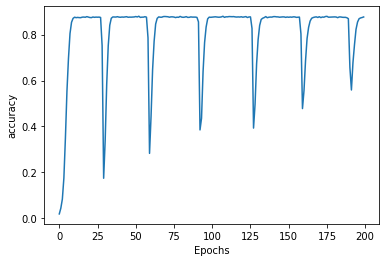

In [ ]:
plot_metric(history, 'accuracy')

## Generate new text

In [23]:
seed_text = "It was a cold night."
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	classes = np.argmax(predicted, axis = 1)    
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == classes:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

2023-02-15 12:20:34.587946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-15 12:20:34.778338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-15 12:20:34.789641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


It was a cold night. in thy straying youth the riper should own sweet eye thee to thee to me hence praise eyes me to me bright me me life made night a heaven's me a old by in their rhyme his me lay then me of me thee summer old men of well thee heaven self wasteful time summer you make you than me be tongue thy with thy self gone some summer myself done me to whose me thee outgoing a abundance was me a you know answer me thee hence death's dateless me me to the old to me those tears thee
